In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# 1. Preprocessing

In [2]:
carData = pd.read_csv("cardata.csv")

In [3]:
df1 = pd.DataFrame(carData)

In [4]:
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df2 = df1.drop({"Car_Name"}, axis = 1)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [7]:
df2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df2.nunique()

Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [9]:
df3 = df2.copy()
df3.insert(1, "Age", (df3.Year.max() + 1) - df3.Year)

In [10]:
df3

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
df3.Age.nunique()

16

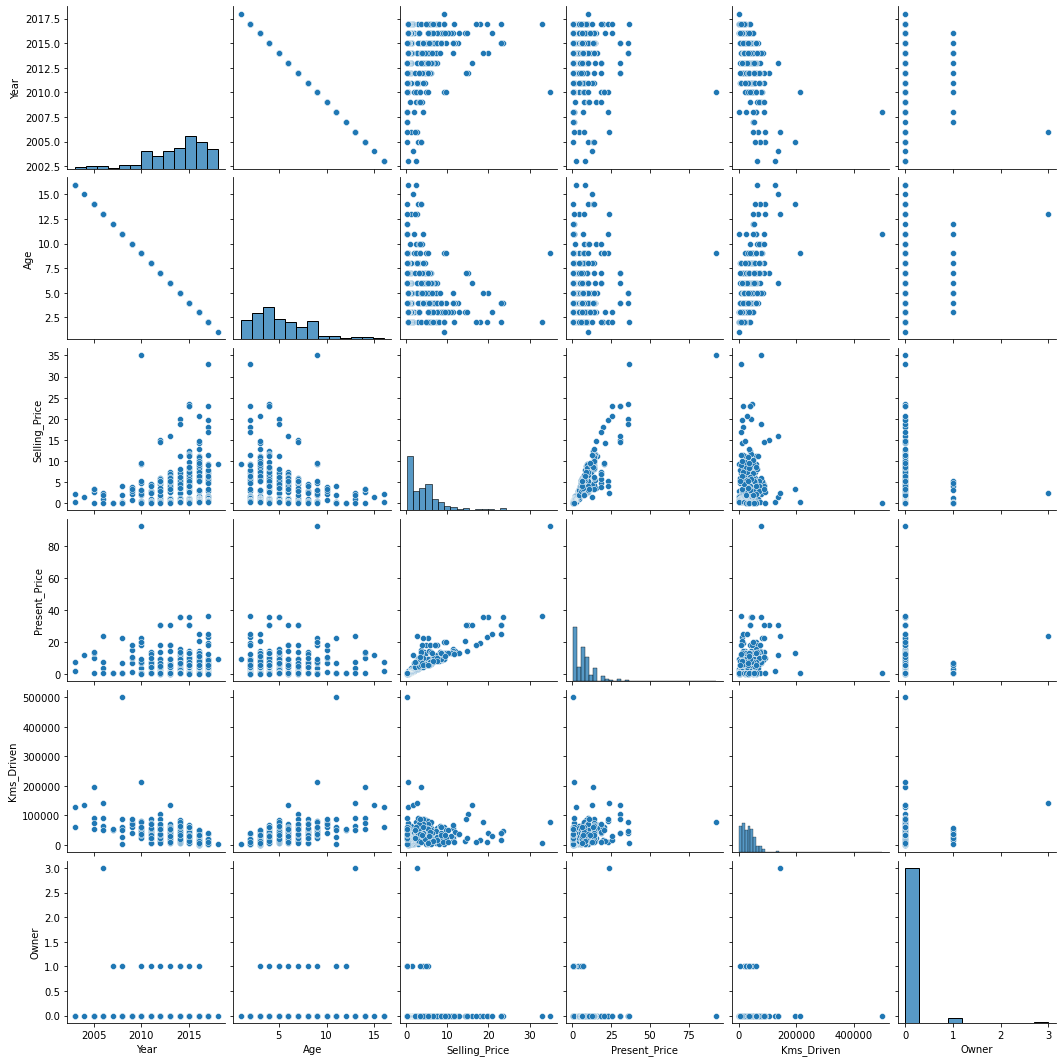

In [12]:
sns.pairplot(df3)
plt.show()

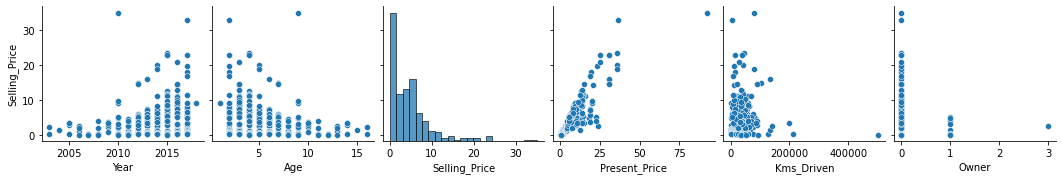

In [13]:
sns.pairplot(df3,y_vars = ["Selling_Price"])
plt.show()

In [14]:
df3.corr()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,-1.000000,0.236141,-0.047584,-0.524342,-0.182104
Age,-1.000000,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,0.236141,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,0.182104,-0.088344,0.008057,0.089216,1.000000


In [15]:
df3.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,1.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,7.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,16.000000,35.000000,92.600000,500000.000000,3.000000


### Sellng_Price > 25 are outliers

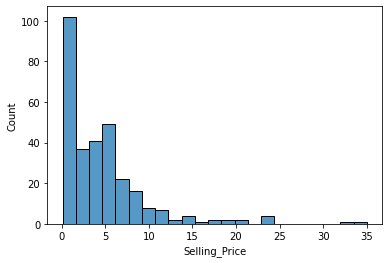

In [16]:
sns.histplot(x = df3.Selling_Price)
plt.show()

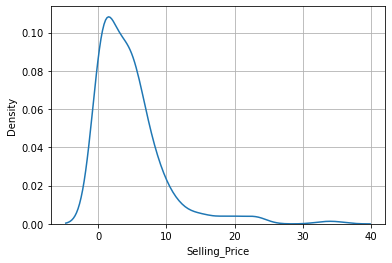

In [17]:
sns.kdeplot(x = df3.Selling_Price)
plt.grid()

In [18]:
df3[df3.Selling_Price > 25]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,2017,2,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,2010,9,35.0,92.60,78000,Diesel,Dealer,Manual,0


### the first row must be checked 
### but the second row is noise

In [19]:
# df3[df3.Kms_Driven <= 80000].sort_values("Kms_Driven").tail()

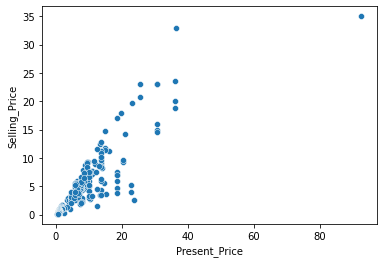

In [20]:
sns.scatterplot(x = df3.Present_Price, y = df3.Selling_Price)
plt.show()

In [21]:
df3[df3.Age == 1].sort_values("Selling_Price").tail()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,2018,1,9.25,9.83,2071,Diesel,Dealer,Manual,0


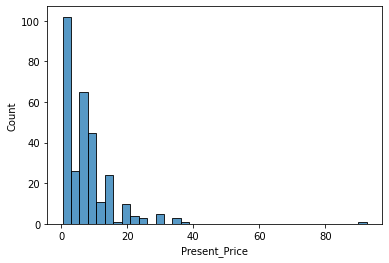

In [22]:
sns.histplot(x = df3.Present_Price)
plt.show()

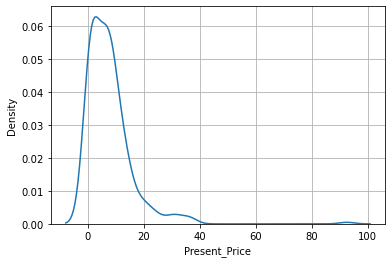

In [23]:
sns.kdeplot(x = df3.Present_Price)
plt.grid()

In [24]:
df3[df3.Present_Price > 75]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,2010,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [25]:
df3[df3.Present_Price > 26]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,2012,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,2015,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,2013,6,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,2014,5,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,2014,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,2015,4,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,2017,2,33.00,36.23,6000,Diesel,Dealer,Automatic,0
79,2012,7,14.50,30.61,89000,Diesel,Dealer,Automatic,0
86,2010,9,35.00,92.60,78000,Diesel,Dealer,Manual,0
93,2015,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [26]:
df3[df3.Present_Price < 50].sort_values("Present_Price")

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
195,2015,4,0.18,0.32,35000,Petrol,Individual,Manual,0
183,2013,6,0.27,0.47,21000,Petrol,Individual,Manual,0
181,2016,3,0.30,0.48,50000,Petrol,Individual,Manual,0
180,2012,7,0.30,0.51,60000,Petrol,Individual,Manual,0
173,2017,2,0.40,0.51,1300,Petrol,Individual,Automatic,0
...,...,...,...,...,...,...,...,...,...
53,2013,6,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,2014,5,19.99,35.96,41000,Diesel,Dealer,Automatic,0
63,2015,4,23.50,35.96,47000,Diesel,Dealer,Automatic,0
62,2014,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0


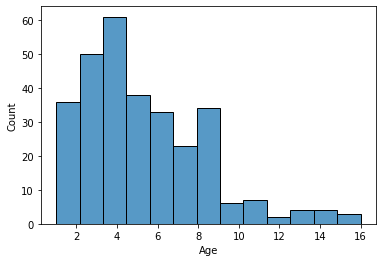

In [27]:
sns.histplot(x = df3.Age)
plt.show()

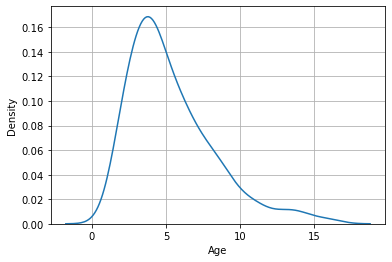

In [28]:
sns.kdeplot(x = df3.Age)
plt.grid()

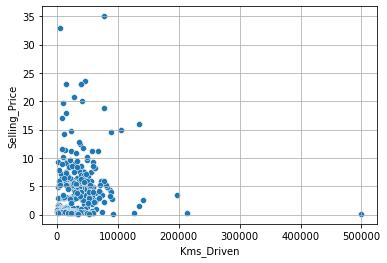

In [29]:
sns.scatterplot(x = df3.Kms_Driven, y = df3.Selling_Price)
plt.grid()
plt.show()

### Kms_Driven  = 500000 is an outlier

<AxesSubplot:xlabel='Kms_Driven', ylabel='Count'>

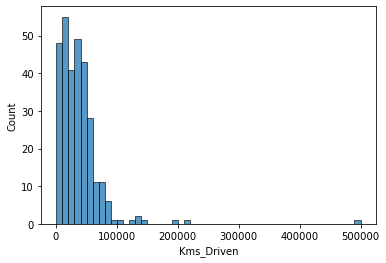

In [30]:
sns.histplot(x = df3.Kms_Driven)

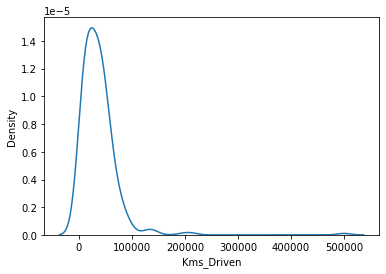

In [31]:
sns.kdeplot(x = df3.Kms_Driven)
plt.show()

In [32]:
df1[df1.Kms_Driven > 300000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [33]:
df3[df3.Year  == 2008].sort_values("Selling_Price")

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,2008,11,0.17,0.520,500000,Petrol,Individual,Automatic,0
190,2008,11,0.20,0.750,60000,Petrol,Individual,Manual,0
194,2008,11,0.20,0.787,50000,Petrol,Individual,Manual,0
184,2008,11,0.25,0.750,26000,Petrol,Individual,Manual,1
185,2008,11,0.25,0.580,1900,Petrol,Individual,Automatic,0
42,2008,11,1.95,7.150,58000,Petrol,Dealer,Manual,0
94,2008,11,4.00,22.780,89000,Petrol,Dealer,Automatic,0


In [34]:
df3[df3.Kms_Driven > 100000].sort_values("Selling_Price")

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,2008,11,0.17,0.52,500000,Petrol,Individual,Automatic,0
179,2010,9,0.31,1.05,213000,Petrol,Individual,Manual,0
37,2003,16,0.35,2.28,127000,Petrol,Individual,Manual,0
77,2004,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
85,2006,13,2.50,23.73,142000,Petrol,Individual,Automatic,3
84,2005,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
50,2012,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,6,16.00,30.61,135000,Diesel,Individual,Automatic,0


In [35]:
df3.head()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


## beacause of the multicolinearity between year and age we should delete on of them
## and the choise is the year to be dropped👇

In [36]:
df3.drop("Year", axis = 1, inplace = True)

In [37]:
sns.color_palette("Set2",3)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549)]

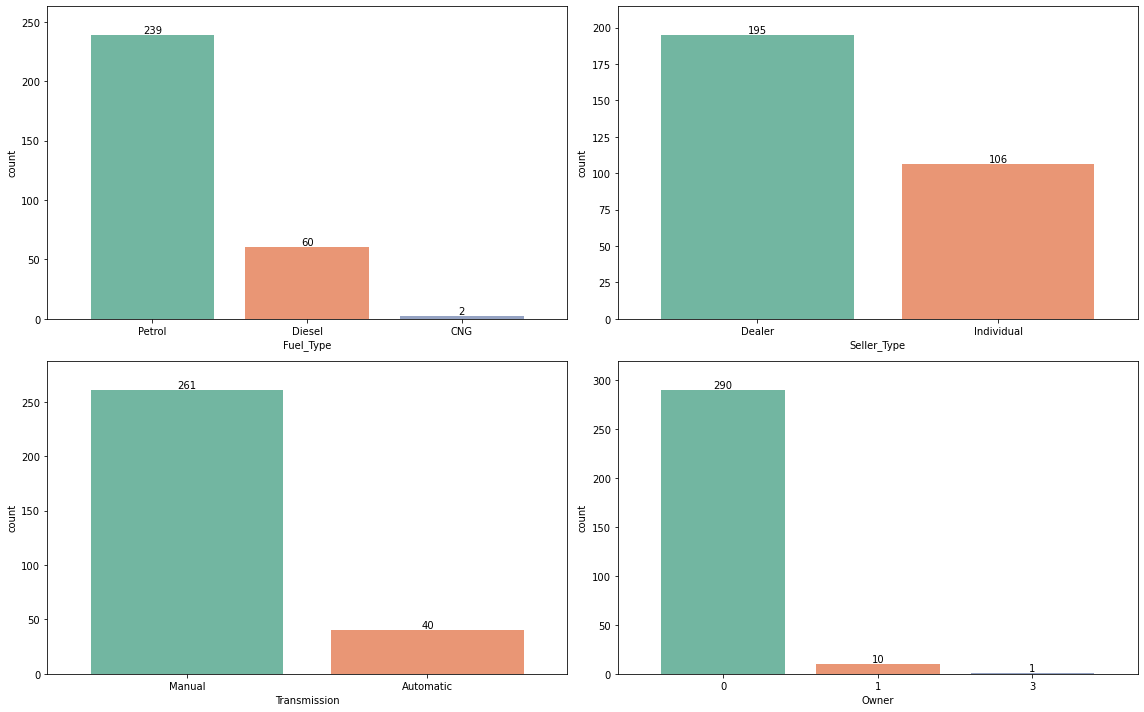

In [38]:
plt.figure(figsize = (16,10))
for i, colName in enumerate("Fuel_Type	Seller_Type	Transmission	Owner".split("	")):
    plt.subplot(2,2, i + 1)
    ax = sns.countplot(x = df3[colName], palette = sns.color_palette("Set2",3))
    for cont in ax.containers :
        ax.bar_label(cont)
    plt.margins((.1))
plt.tight_layout()
plt.show()

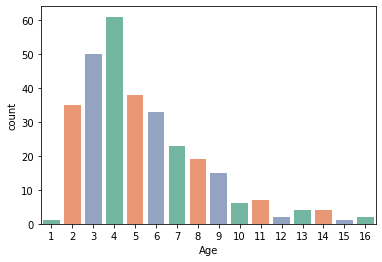

In [39]:
sns.countplot(x = df3.Age, palette = sns.color_palette("Set2",3))
plt.show()

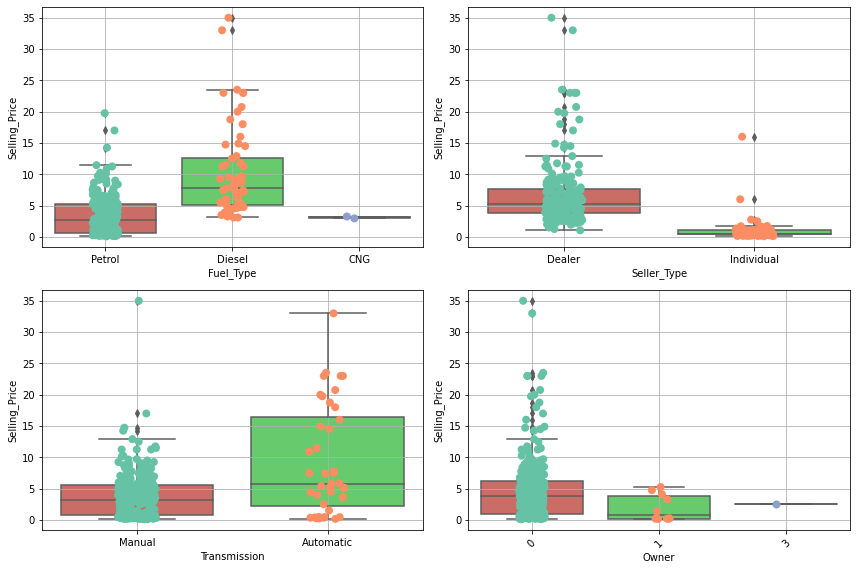

In [40]:
plt.figure(figsize = (12,8))
for i, colName in enumerate("Fuel_Type	Seller_Type	Transmission	Owner".split("	")):
    plt.subplot(2,2, i + 1)
    sns.boxplot(x = df3[colName], y = df3.Selling_Price, palette = sns.color_palette("hls", 3))
    sns.stripplot(x = df3[colName], y = df3.Selling_Price, palette = sns.color_palette("Set2", 3), s = 8)
    plt.grid()
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [41]:
df3[df3.Selling_Price > 30]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,2,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,9,35.0,92.60,78000,Diesel,Dealer,Manual,0


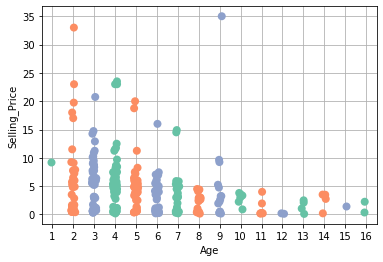

In [42]:
sns.stripplot(x = df3.Age, y = df3.Selling_Price, palette = sns.color_palette("Set2",3), s = 8)
plt.grid()
plt.show()

### the behaviour of Age is opposite of Year with target 👆

In [43]:
df3.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

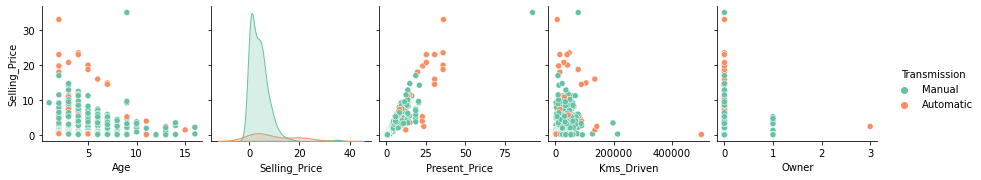

In [44]:
sns.pairplot(df3, y_vars = ["Selling_Price"], hue = "Transmission", palette = sns.color_palette("Set2", 2))
plt.show()

In [45]:
df3.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

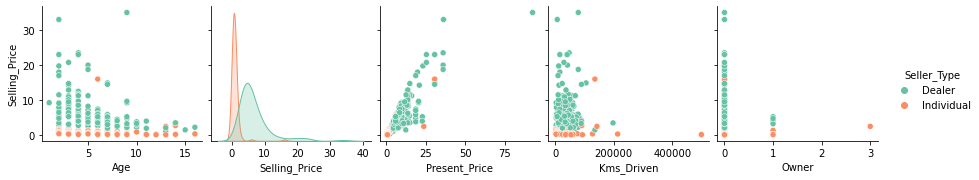

In [46]:
sns.pairplot(df3, y_vars = ["Selling_Price"], hue = "Seller_Type", palette = sns.color_palette("Set2", 2))
plt.show()

In [47]:
df3.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

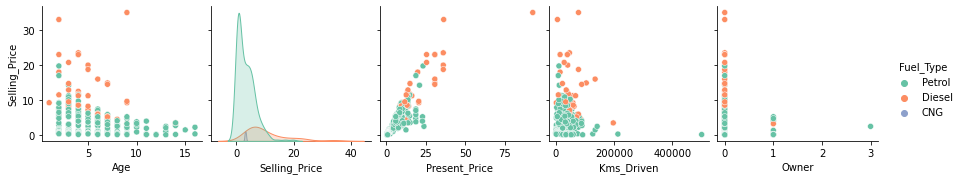

In [48]:
sns.pairplot(df3, y_vars = ["Selling_Price"], hue = "Fuel_Type", palette = sns.color_palette("Set2", 3))
plt.show()

In [49]:
df3.describe(include = "object")

,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


# 2. Detecting Errors

In [50]:
df3.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df3.isna().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [52]:
df3.duplicated().sum()

2

In [53]:
df3[df3.duplicated()]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [54]:
df4 = df3.drop_duplicates()

In [55]:
df4.duplicated().sum()

0

### Outliers wich are noises 👇👇

In [56]:
## 

In [57]:
df4.loc[[86]]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


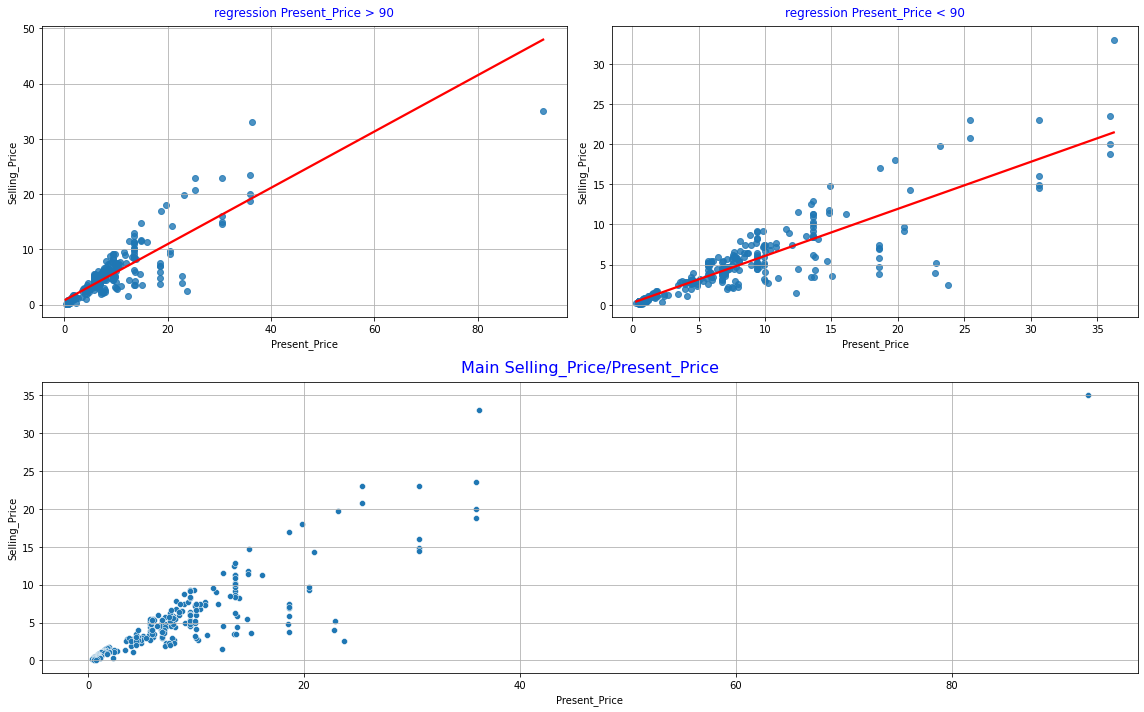

In [58]:
plt.figure(figsize = (16,10))
plt.subplot(221)
plt.title("regression Present_Price > 90", pad = 10, color = "b")
sns.regplot(x = "Present_Price", y = "Selling_Price", data = df4,ci = None,
           line_kws = {"color" :"r"})
plt.grid()
plt.subplot(222)
plt.title("regression Present_Price < 90", pad = 10, color = "b")
sns.regplot(x = "Present_Price", y = "Selling_Price", data = df4[df4.Present_Price < 90], ci = None, 
           line_kws = {"color" :"r"})
plt.grid()
plt.subplot(212)
plt.title("Main Selling_Price/Present_Price", pad = 10, color = "b", fontsize = 16)
sns.scatterplot(x = "Present_Price", y = "Selling_Price", data = df4)
plt.grid()
plt.tight_layout()
plt.show()

### noise explanation : 
+ data in present price higher than 90 can change our assumptions. <br> 
in the relationship with the target it changes the range of the target <br>
from 0 < target < 35 to 0 < target < 50 <br>
so it is not good for our future model

In [59]:
df5 = df4.drop(86)

# 3. ReAnalyzing

In [60]:
df6 = df5.sort_values(by = "Age").reset_index(drop = True)

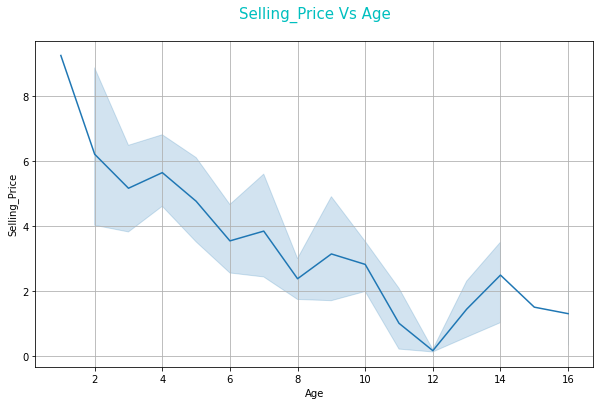

In [61]:
plt.figure(figsize = (10,6))
sns.lineplot(x = df6.Age, y = df6.Selling_Price)
plt.title("Selling_Price Vs Age", y = 1.05, size = 15, color = "c")
plt.grid()
plt.show()

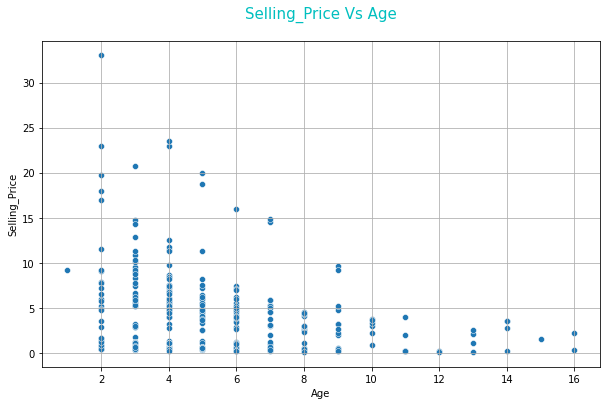

In [62]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df6.Age, y = df6.Selling_Price)
plt.title("Selling_Price Vs Age", y = 1.05, size = 15, color = "c")
plt.grid()
plt.show()

+ the plot shows that the age has an inverse non-linear relationship with the target in such a way <br>
the age is increased the target will be descreased and vice versa<br>
+ the result of this plot is that the age highly affects  on the target 

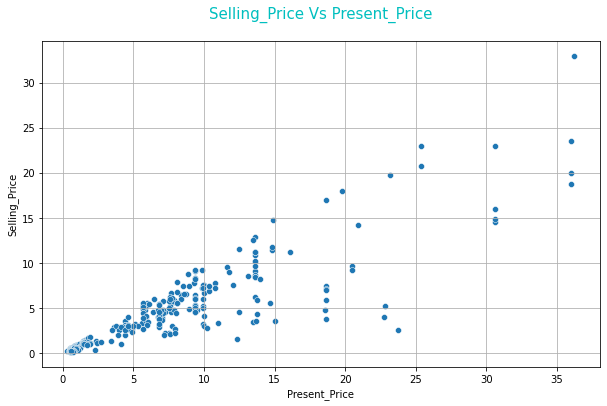

In [63]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df6.Present_Price, y = df6.Selling_Price)
plt.title("Selling_Price Vs Present_Price", y = 1.05, size = 15, color = "c")
plt.grid()
plt.show()

+ the plot shows that the present price has an increamental lineary relationship with the target <br>
+ whenever the present price is increased the target will be discreased and vice versa <br>
+ the result of this plot is that the present price highly affects  on the target 

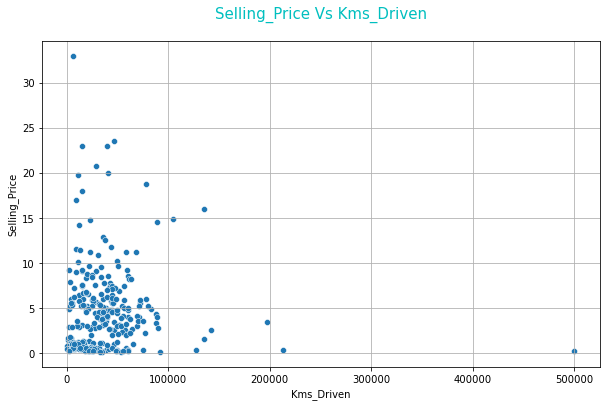

In [64]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df6.Kms_Driven, y = df6.Selling_Price)
plt.title("Selling_Price Vs Kms_Driven", y = 1.05, size = 15, color = "c")
plt.grid()
plt.show()

+ the plot shows that the Kms_Driven has a good inverse non-linear relationship with the target in such a way<br>
the Kms_Driven is increased the target will be descreased and vice versa.<br>
+ the result of this plot is that the Kms_Driven highly affects  on the target 

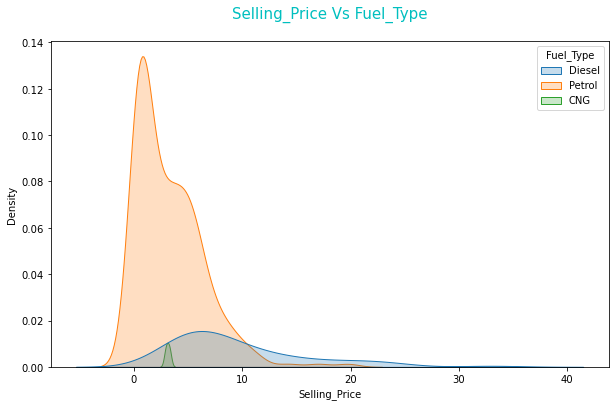

In [65]:
plt.figure(figsize = (10,6))
sns.kdeplot(x = "Selling_Price", data = df6, hue = "Fuel_Type", fill = True,)
plt.title("Selling_Price Vs Fuel_Type", y = 1.05, size = 15, color = "c")
plt.show()

+ the plot shows that cars with the fuel of diesel are more expensive than those with the fule_type of Petrol and CNG 

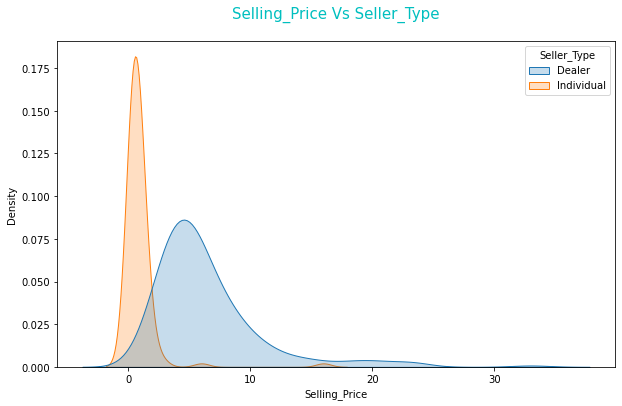

In [66]:
plt.figure(figsize = (10,6))
sns.kdeplot(x = "Selling_Price", data = df6, hue = "Seller_Type", fill = True)
plt.title("Selling_Price Vs Seller_Type", y = 1.05, size = 15, color = "c")
plt.show()

+ the plot shows that sellers which are Dealer have sold out houses more expensive than those sellers
which are Individual

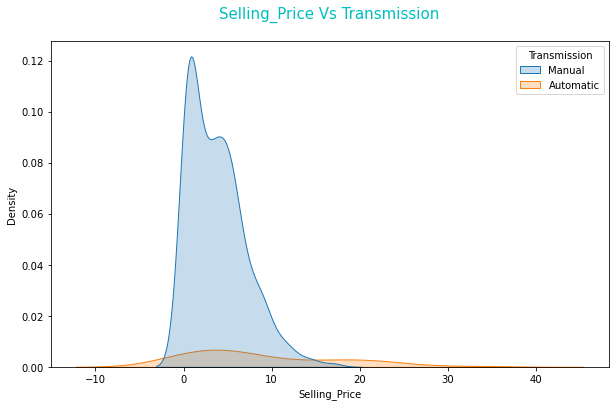

In [67]:
plt.figure(figsize = (10,6))
sns.kdeplot(x = "Selling_Price", data = df6, hue = "Transmission", fill = True)
plt.title("Selling_Price Vs Transmission", y = 1.05, size = 15, color = "c")
plt.show()

+ the plot shows that cars which are automatic is more expensive than cars are Manual

In [68]:
###############

# 4. ML

In [69]:
def y_positioning(df , y_name , pos = 0):
    y = df[y_name]
    df = df.drop(columns = {y_name})
    df.insert(pos, y_name, y)
    return df

In [70]:
def cross_validation_score(X, y, kfold,shuffle = False , random_state = None):
    model = LinearRegression()
    res = cross_val_score(model,X, y, cv = KFold(kfold, shuffle = shuffle , random_state = random_state))
    print(res, "mean : ", res.mean(), "std : ", res.std(), sep = "\n")

In [71]:
def evaluate(y_test, y_pred):
    print(
        "MAE : ", metrics.mean_absolute_error(y_test,y_pred),
        "RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        "r2 score : ",metrics.r2_score(y_test, y_pred),
        "EVS : ", metrics.explained_variance_score(y_test, y_pred), sep = "\n"
    )

In [72]:
def get_mean_cross(X, y, start, stop, step, shuffle = False , random_state = None):
    model = LinearRegression()
    res = []
    if start > stop :
        res = [{"KFold" : i, "Mean_Score" : cross_val_score(LinearRegression(),X, y, cv = KFold(i, shuffle = shuffle, random_state = random_state)).mean()} for i in range(start, (stop + 1), -step)] 
    elif start < stop :
        res = [{"KFold" : i,"Mean_Score" : cross_val_score(LinearRegression(),X, y, cv = KFold(i, shuffle = shuffle, random_state = random_state)).mean()} for i in range(start, (stop + 1), abs(step))] 
    return res

In [73]:
def plot_cross_mean(res, kind = "bar"):
    res.plot(x = 0, y = 1, kind = kind.strip(), color = "b")
    if kind == "line":
        plt.xticks(ticks = np.arange(2,11,1))
    plt.xlabel("KFold")
    plt.ylabel("Mean_Score")
    plt.legend(bbox_to_anchor = (1, 1))
    plt.grid()
    plt.show()

In [74]:
df7 = y_positioning(df6, "Selling_Price", df6.shape[1] - 1)

In [75]:
df7

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,1,9.83,2071,Diesel,Dealer,Manual,0,9.25
1,2,9.40,15141,Petrol,Dealer,Manual,0,9.10
2,2,6.49,16200,Petrol,Individual,Manual,0,6.00
3,2,4.43,38488,Petrol,Dealer,Manual,0,3.50
4,2,0.87,3000,Petrol,Individual,Manual,0,0.80
...,...,...,...,...,...,...,...,...
293,14,10.21,90000,Petrol,Individual,Manual,0,2.75
294,14,0.57,55000,Petrol,Individual,Manual,0,0.20
295,15,12.35,135154,Petrol,Dealer,Automatic,0,1.50
296,16,7.98,62000,Petrol,Dealer,Manual,0,2.25


## Label encoding

In [76]:
label_encoder = preprocessing.LabelEncoder()
df_label_enc = df7.copy()
df_label_enc["Fuel_Type"] = label_encoder.fit_transform(df7["Fuel_Type"])
df_label_enc["Seller_Type"] = label_encoder.fit_transform(df7["Seller_Type"])
df_label_enc["Transmission"] = label_encoder.fit_transform(df7["Transmission"])
df_label_enc.head()

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,1,9.83,2071,1,0,1,0,9.25
1,2,9.40,15141,2,0,1,0,9.10
2,2,6.49,16200,2,1,1,0,6.00
3,2,4.43,38488,2,0,1,0,3.50
4,2,0.87,3000,2,1,1,0,0.80


## OneHotEncoding

In [77]:
df_oneHot_enc = pd.get_dummies(df7, columns = df7.iloc[:, 3:6].columns, prefix = df7.iloc[:, 3:6].columns, drop_first = True)
df_oneHot_enc = y_positioning(df_oneHot_enc, "Selling_Price", df_oneHot_enc.shape[1] - 1)
df_oneHot_enc.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,1,9.83,2071,0,1,0,0,1,9.25
1,2,9.40,15141,0,0,1,0,1,9.10
2,2,6.49,16200,0,0,1,1,1,6.00
3,2,4.43,38488,0,0,1,0,1,3.50
4,2,0.87,3000,0,0,1,1,1,0.80


In [78]:
X1, y1 = df_label_enc.iloc[:, :-1], df_label_enc.Selling_Price.values.reshape(-1,1)
X2, y2 = df_oneHot_enc.iloc[:, :-1], df_oneHot_enc.Selling_Price.values.reshape(-1,1)
X_train1 , X_test1, y_train1 , y_test1 = train_test_split(X1,y1, test_size = .3, random_state = 0)
X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)

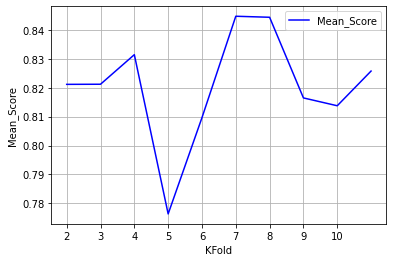

In [79]:
res = pd.DataFrame(get_mean_cross(X1,y1,2, 11, 1, True, 0))
plot_cross_mean(res, "line")

In [80]:
res.sort_values("Mean_Score")

,KFold,Mean_Score
3,5,0.776300
4,6,0.809653
8,10,0.813778
7,9,0.816493
0,2,0.821194
1,3,0.821235
9,11,0.825802
2,4,0.831480
6,8,0.844438
5,7,0.844794


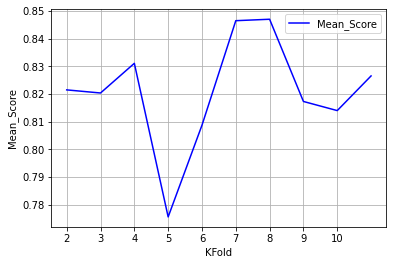

In [81]:
res = pd.DataFrame(get_mean_cross(X2,y2,2, 11, 1, True, 0))
plot_cross_mean(res, "line")

In [82]:
res.sort_values("Mean_Score")

,KFold,Mean_Score
3,5,0.775590
4,6,0.808693
8,10,0.813977
7,9,0.817273
1,3,0.820330
0,2,0.821451
9,11,0.826492
2,4,0.831044
5,7,0.846437
6,8,0.846958


In [83]:
evaluate(y_test1, LinearRegression().fit(X_train1, y_train1).predict(X_test1))

MAE : 
1.3938280488620656
RMSE : 
2.711610529369046
r2 score : 
0.7238502796104489
EVS : 
0.7267152438555899


In [84]:
evaluate(y_test2, LinearRegression().fit(X_train2, y_train2).predict(X_test2))

MAE : 
1.3816520826208682
RMSE : 
2.738520005995807
r2 score : 
0.7183421755081387
EVS : 
0.7217492014331865


In [85]:
df1_2 = df_label_enc[df_label_enc.Kms_Driven != 500000]
df2_2 = df_oneHot_enc[df_oneHot_enc.Kms_Driven != 500000]
X1, y1 = df1_2.iloc[:, :-1], df1_2.Selling_Price.values.reshape(-1,1) # label
X2, y2 = df2_2.iloc[:, :-1], df2_2.Selling_Price.values.reshape(-1,1) # one hot
X_train1 , X_test1, y_train1 , y_test1 = train_test_split(X1,y1, test_size = .3, random_state = 0)
X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)

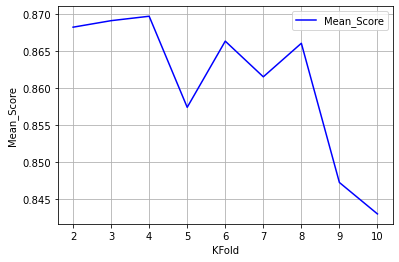

In [86]:
res = pd.DataFrame(get_mean_cross(X1,y1,2, 10, 1, True, 0))
plot_cross_mean(res, "line")

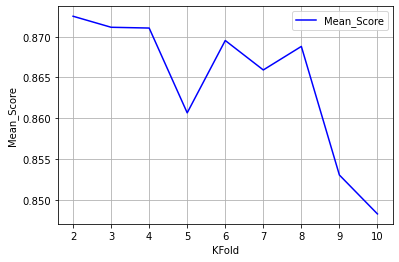

In [87]:
res = pd.DataFrame(get_mean_cross(X2,y2,2, 10, 1, True, 0))
plot_cross_mean(res, "line")

In [88]:
evaluate(y_test1, LinearRegression().fit(X_train1, y_train1).predict(X_test1))

MAE : 
1.2673169213706723
RMSE : 
2.0338502648708086
r2 score : 
0.8401624200179149
EVS : 
0.842498567671799


In [89]:
evaluate(y_test2, LinearRegression().fit(X_train2, y_train2).predict(X_test2))

MAE : 
1.2182296913995876
RMSE : 
1.974792251303989
r2 score : 
0.8493102294002479
EVS : 
0.8508067247929448


In [90]:
df1_2 = df_label_enc.loc[(df_label_enc.Kms_Driven != 500000) & (df_label_enc.Selling_Price != 33)].reset_index(drop = True)
df2_2 = df_oneHot_enc[(df_oneHot_enc.Kms_Driven != 500000) & (df_oneHot_enc.Selling_Price != 33)].reset_index(drop = True)
X1, y1 = df1_2.iloc[:, :-1], df1_2.Selling_Price.values.reshape(-1,1) # label
X2, y2 = df2_2.iloc[:, :-1], df2_2.Selling_Price.values.reshape(-1,1) # one hot
X_train1 , X_test1, y_train1 , y_test1 = train_test_split(X1,y1, test_size = .3, random_state = 0)
X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)

In [91]:
df_oneHot_enc[(df_oneHot_enc.Kms_Driven == 500000) | (df_oneHot_enc.Selling_Price == 33)].sort_values("Present_Price")

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
284,11,0.52,500000,0,0,1,1,0,0.17
27,2,36.23,6000,0,1,0,0,0,33.00


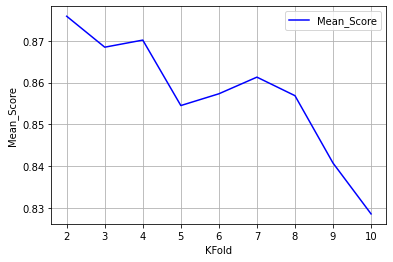

In [92]:
res = pd.DataFrame(get_mean_cross(X1,y1,2, 10, 1, True, 0))
plot_cross_mean(res,"line")

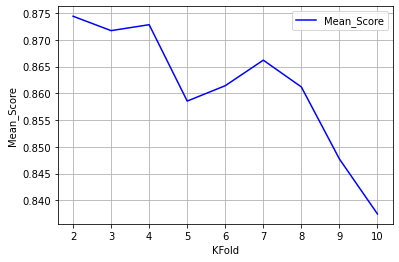

In [93]:
res = pd.DataFrame(get_mean_cross(X2,y2,2, 10, 1, True, 0))
plot_cross_mean(res,"line")

In [94]:
evaluate(y_test1, LinearRegression().fit(X_train1, y_train1).predict(X_test1))

MAE : 
1.1656043830151517
RMSE : 
1.7025364549003938
r2 score : 
0.8767884548283813
EVS : 
0.8776295184701745


In [95]:
evaluate(y_test2, LinearRegression().fit(X_train2, y_train2).predict(X_test2))

MAE : 
1.135415111037773
RMSE : 
1.658983858963908
r2 score : 
0.883011577334913
EVS : 
0.8839405932876853


In [96]:
df_label_enc[(df_label_enc.Kms_Driven == 500000) | (df_label_enc.Selling_Price > 30)]

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
27,2,36.23,6000,1,0,0,0,33.00
284,11,0.52,500000,2,1,0,0,0.17


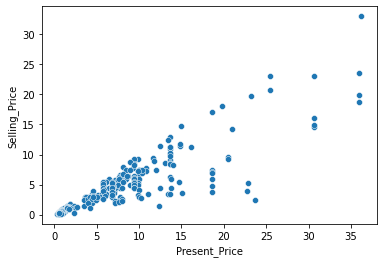

In [97]:
sns.scatterplot(x = df_oneHot_enc.Present_Price, y = df_oneHot_enc.Selling_Price)
plt.show()

# ------------------------------------

In [98]:
df_label_enc2 = df_label_enc.drop(df_label_enc[(df_label_enc.Kms_Driven == 500000) | (df_label_enc.Selling_Price > 30) ].index).reset_index(drop = True)
df_oneHot_enc2 = df_oneHot_enc.drop(df_oneHot_enc[(df_oneHot_enc.Kms_Driven == 500000) | (df_oneHot_enc.Selling_Price > 30)].index).reset_index(drop = True)

In [99]:
df_oneHot_enc[(df_oneHot_enc.Kms_Driven == 500000) | (df_oneHot_enc.Selling_Price > 30)]

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
27,2,36.23,6000,0,1,0,0,0,33.00
284,11,0.52,500000,0,0,1,1,0,0.17


+ above we have seen that by removing  two rows above step by step <br>
Both our accuracy of the model increased and the error decreased <br>
so with removing these rows we have better performance in our model
+ For both OneHotEncoding and LabelEncoding we found out that OneHotEncoding has better <br>
performance in our model, so this method is selected as the base encoding

# ------------------------------------

In [100]:
X2, y2 = df_oneHot_enc2.iloc[:, :-1], df_oneHot_enc2.Selling_Price.values.reshape(-1,1) # one hot
X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)

In [101]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)
y_pred = regressor.predict(X_test2)

In [102]:
print("score on Test data : " , regressor.score(X_test2, y_test2),
     "score on Train data : ", regressor.score(X_train2, y_train2), sep = "\n")

score on Test data : 
0.883011577334913
score on Train data : 
0.8853803549877249


In [103]:
print("intercept : ", regressor.intercept_, "Slope : ", regressor.coef_, sep = "\n" )

intercept : 
[3.07406024]
Slope : 
[[-2.92634093e-01  5.02371343e-01 -1.95821986e-05 -7.92986188e-01
   1.96863249e+00  4.57375004e-01 -8.81681413e-01 -5.15425953e-01]]


In [104]:
df_test = X_test2.copy()
df_test["y_test"] = y_test2
df_test["y_pred"] = y_pred

In [105]:
df_test2 = df_test.sort_values(by = "Present_Price")

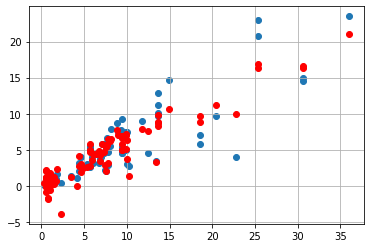

In [106]:
plt.scatter(df_test2.Present_Price, df_test2.y_test)
plt.plot(df_test2.Present_Price, df_test2.y_pred, "or")
plt.grid()
plt.show()

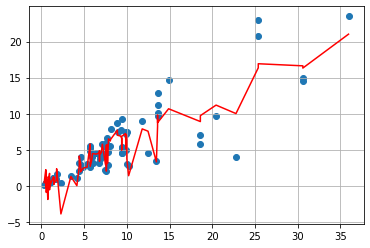

In [107]:
plt.scatter(df_test2.Present_Price, df_test2.y_test)
plt.plot(df_test2.Present_Price, df_test2.y_pred, "-r")
plt.grid()
plt.show()

In [108]:
df_test2 = df_test.sort_values(by = "Kms_Driven")

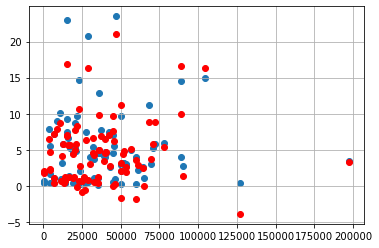

In [109]:
plt.scatter(df_test2.Kms_Driven, df_test2.y_test)
plt.plot(df_test2.Kms_Driven, df_test2.y_pred, "or")
plt.grid()
plt.show()

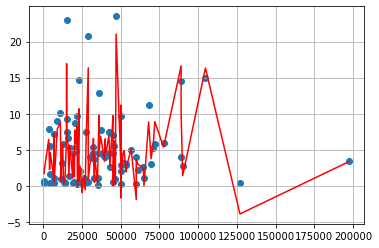

In [110]:
plt.scatter(df_test2.Kms_Driven, df_test2.y_test)
plt.plot(df_test2.Kms_Driven, df_test2.y_pred, "-r")
plt.grid()
plt.show()

In [111]:
df_test2 = df_test.sort_values(by = "Age")

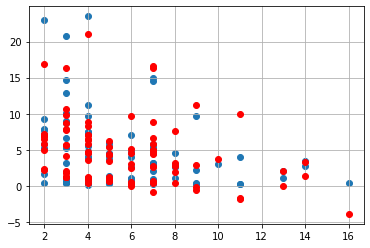

In [112]:
plt.scatter(df_test2.Age, df_test2.y_test)
plt.plot(df_test2.Age, df_test2.y_pred, "or")
plt.grid()
plt.show()

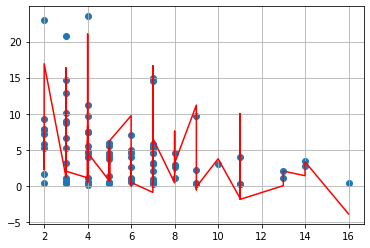

In [113]:
plt.scatter(df_test2.Age, df_test2.y_test)
plt.plot(df_test2.Age, df_test2.y_pred, "-r")
plt.grid()
plt.show()

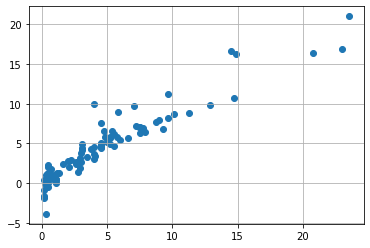

In [114]:
plt.scatter(y_test2.flatten(), y_pred.flatten())
plt.grid()
plt.show()

In [115]:
evaluate(y_test2, y_pred)

MAE : 
1.135415111037773
RMSE : 
1.658983858963908
r2 score : 
0.883011577334913
EVS : 
0.8839405932876853


In [116]:
# res = []

In [117]:
list_index = []
df_dim = df_oneHot_enc2.copy()
poly = preprocessing.PolynomialFeatures(5, include_bias = False)
X_poly = poly.fit_transform(df_oneHot_enc2.iloc[:, :-1])
df1 = pd.DataFrame(X_poly, columns = poly.get_feature_names_out()).iloc[:, 8 :]

X2, y2 = df_oneHot_enc2.iloc[:, :-1], df_oneHot_enc2.Selling_Price.values.reshape(-1,1) # one hot
X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)
reg = LinearRegression()
r2 = round(regressor.score(X_test2, y_test2),3)
r2

0.883

In [118]:
k = 0
for i2 in np.arange(df1.shape[1]):
    df_dim.insert(0, df1.columns[i2], df1.iloc[:, i2])
    X2, y2 = df_dim.iloc[:, :-1], df_dim.Selling_Price.values.reshape(-1,1) # one hot
    X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)
    reg = LinearRegression()
    reg.fit(X_train2, y_train2)
    r2_new = round(reg.score(X_test2, y_test2), 3)
    if r2_new > r2 :
        list_index.append(i2)
        r2 = r2_new
    else :
        df_dim.drop(columns = df1.columns[i2], inplace = True)
    k += 1;
# res.append((8, reg.score(X_train2, y_train2), reg.score(X_test2, y_test2)))

<pre>
   Degree  Train_Score  Test_Score
0       2     0.969640    0.968505
1       3     0.980901    0.982680
2       4     0.980901    0.982680
3       5     0.981244    0.984541
4       6     0.981244    0.984541
5       7     0.981244    0.984541
6       8     0.981244    0.984541
</pre>

+ In this section we selected the degree 5 because in the degrees higher than 5 to +infinity we have <br>
the same score and new added features, 
totally the degree 5 is optimal and better

In [119]:
# print(pd.DataFrame(res, columns = "Degree Train_Score Test_Score".split()).to_string())

### the amount of  columns added to df_dim from 5 to +infinity degreee 👇

In [120]:
len(list_index)

11

In [121]:
df_dim.head()

,Age Kms_Driven Fuel_Type_Petrol Seller_Type_Individual Transmission_Manual,Age Present_Price^3 Fuel_Type_Diesel,Present_Price Fuel_Type_Petrol Transmission_Manual,Present_Price^3,Age Present_Price Seller_Type_Individual,Age^2 Present_Price,Kms_Driven^2,Present_Price Fuel_Type_Diesel,Age Kms_Driven,Age Present_Price,Age^2,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,0.0,949.862087,0.00,949.862087,0.00,9.83,4.289041e+06,9.83,2071.0,9.83,1.0,1,9.83,2071,0,1,0,0,1,9.25
1,0.0,0.000000,9.40,830.584000,0.00,37.60,2.292499e+08,0.00,30282.0,18.80,4.0,2,9.40,15141,0,0,1,0,1,9.10
2,32400.0,0.000000,6.49,273.359449,12.98,25.96,2.624400e+08,0.00,32400.0,12.98,4.0,2,6.49,16200,0,0,1,1,1,6.00
3,0.0,0.000000,4.43,86.938307,0.00,17.72,1.481326e+09,0.00,76976.0,8.86,4.0,2,4.43,38488,0,0,1,0,1,3.50
4,6000.0,0.000000,0.87,0.658503,1.74,3.48,9.000000e+06,0.00,6000.0,1.74,4.0,2,0.87,3000,0,0,1,1,1,0.80


### so the final model selection with the new df named df_dim -- > (daraframe_dimension) 👇👇

In [122]:
X2, y2 = df_dim.iloc[:, :-1], df_dim.Selling_Price.values.reshape(-1,1) # one hot
X_train2 , X_test2, y_train2 , y_test2 = train_test_split(X2,y2, test_size = .3, random_state = 0)
FinalModel = LinearRegression()
FinalModel.fit(X_train2, y_train2)
y_pred = FinalModel.predict(X_test2)

In [123]:
print("Intercept : ", FinalModel.intercept_,
     "Coefficients : ", FinalModel.coef_, sep = "\n")

Intercept : 
[-0.69680348]
Coefficients : 
[[ 4.76504527e-07  1.60401739e-05 -4.81267993e-02 -2.23235956e-04
   2.34067213e-03  5.72080412e-03  1.23687483e-11  1.62453439e-01
  -1.30392023e-08 -1.46028728e-01 -1.52517026e-02  2.71029198e-01
   1.19441391e+00 -1.09638039e-05 -1.20516480e-01 -6.58872773e-01
   7.07629612e-01 -5.92787379e-01 -6.06927553e-02]]


In [124]:
print("These Scores are on degree 3 👇👇", end = "\n"*2)
print("The best-fit-line score : ", r2, sep = "\n")
print("----------------")
print("X_test Score : ", FinalModel.score(X_test2, y_test2), 
      "X_train Score : ", FinalModel.score(X_train2, y_train2), sep = "\n")
print("----------------")
evaluate(y_test2, y_pred)

These Scores are on degree 3 👇👇

The best-fit-line score : 
0.985
----------------
X_test Score : 
0.9846276532623424
X_train Score : 
0.9812726691679623
----------------
MAE : 
0.434890570983501
RMSE : 
0.6013686771958471
r2 score : 
0.9846276532623424
EVS : 
0.9848524430187648


In [125]:
X_test2["y_test"] = y_test2
X_test2["y_pred"] = y_pred

In [126]:
df_test = X_test2.sort_values(by = "Present_Price")

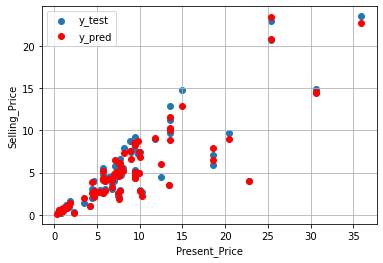

In [127]:
plt.scatter(df_test.Present_Price, df_test.y_test)
plt.plot(df_test.Present_Price, df_test.y_pred, "or")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.legend(["y_test", "y_pred"])
plt.grid()
plt.show()

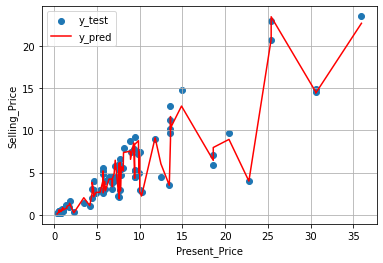

In [128]:
plt.scatter(df_test.Present_Price, df_test.y_test)
plt.plot(df_test.Present_Price, df_test.y_pred, "-r")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.legend(["y_test", "y_pred"])
plt.grid()
plt.show()

In [129]:
df_test = X_test2.sort_values(by = "Kms_Driven")

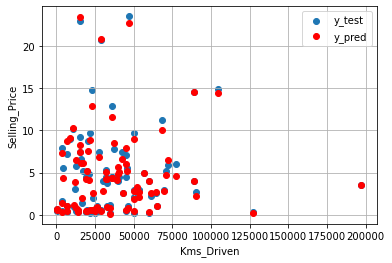

In [130]:
plt.scatter(df_test.Kms_Driven, df_test.y_test)
plt.plot(df_test.Kms_Driven, df_test.y_pred, "or")
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")
plt.legend(["y_test", "y_pred"])
plt.grid()
plt.show()

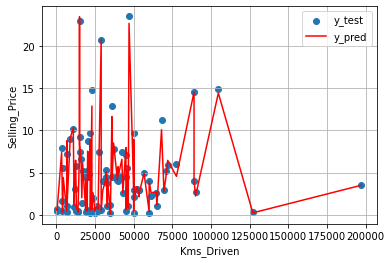

In [131]:
plt.scatter(df_test.Kms_Driven, df_test.y_test)
plt.plot(df_test.Kms_Driven, df_test.y_pred, "-r")
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")
plt.legend(["y_test", "y_pred"])
plt.grid()
plt.show()

In [132]:
df_test = X_test2.sort_values(by = "Age")

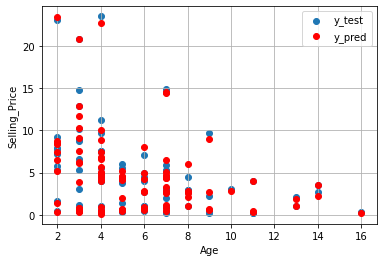

In [133]:
plt.scatter(df_test.Age, df_test.y_test)
plt.plot(df_test.Age, df_test.y_pred, "or")
plt.xlabel("Age")
plt.ylabel("Selling_Price")
plt.legend(["y_test", "y_pred"])
plt.grid()
plt.show()

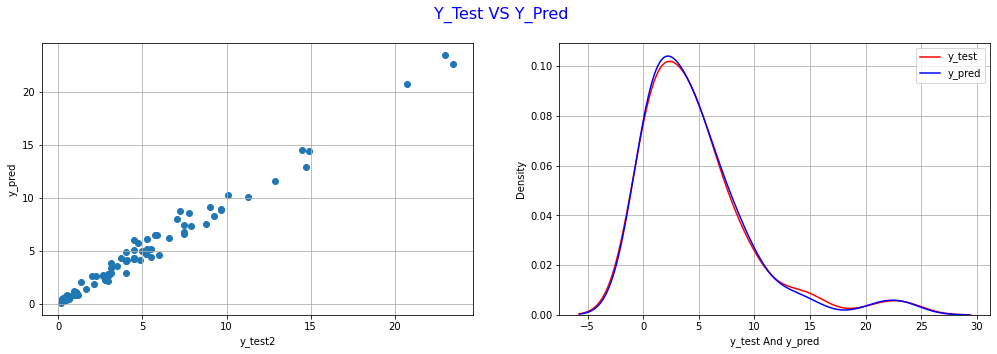

In [134]:
# plt.scatter(df_test.Present_Price, df_test.y_test)
plt.figure(figsize = (17, 5))
plt.subplot(121)
plt.scatter(y_test2, y_pred)
plt.xlabel("y_test2")
plt.ylabel("y_pred")
plt.grid()

plt.subplot(122)
sns.kdeplot(x = y_test2.ravel(), label = "y_test", color = "r")
sns.kdeplot(x = y_pred.ravel(), label = "y_pred", color = "b")
plt.xlabel("y_test And y_pred")
plt.legend()
plt.grid()
plt.suptitle("Y_Test VS Y_Pred", y = 0.98, size = 16, color = "b")

plt.show()

In [135]:
compare = pd.DataFrame({"Actual" : y_test2.ravel(), "y_pred" : y_pred.ravel()})
compare

,Actual,y_pred
0,14.90,14.414706
1,0.50,0.825319
2,23.00,23.451057
3,5.35,5.077809
4,2.25,2.643564
...,...,...
84,5.50,4.425766
85,4.85,4.093495
86,1.15,0.786032
87,4.50,4.333030


In [136]:
def convert_to_poly(df, list_index):
    poly = preprocessing.PolynomialFeatures(5, include_bias = False)
    X_poly = poly.fit_transform(df.iloc[:, :-1])
    df1 = pd.DataFrame(X_poly, columns = poly.get_feature_names_out()).iloc[:, 8 : ].iloc[:,  list_index[::-1]]
    df_predict = pd.concat([df1, df], axis = 1)
    return df_predict

In [137]:
df_cross = pd.DataFrame(get_mean_cross(df_dim.iloc[:, :-1], 
                                       df_dim.Selling_Price.values.reshape(-1,1), 2,10, 1, True, 0))

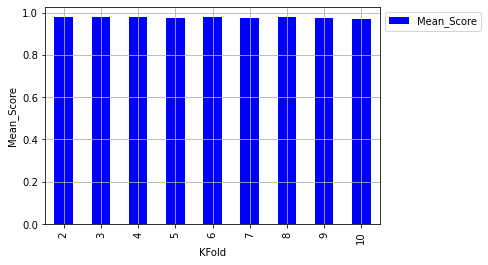

In [138]:
plot_cross_mean(df_cross)

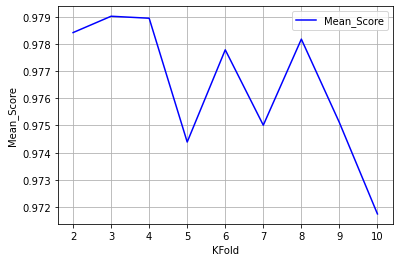

In [139]:
plot_cross_mean(df_cross, "line")

+ In this report we can observe great performance in each random state <br>
but the main point is that it generally shows a great performance in our dataset

# ---------------------------------------------------------------

<h3> this the col index of what i picked up from the polynomial result dataframe 👇👇 </h3>

In [140]:
np.array(list_index)

array([  0,   1,   2,  11,  15,  37,  49,  72,  96, 609, 740])

## FinalModel with 100% of data 

In [141]:
X_train2, y_train2 = df_dim.iloc[:, :-1], df_dim.Selling_Price.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression()

# -----------------

<p>
  present_price : 11.23,
    "Kms_Driven" :  42000
    , "Fuel_Type" : petrol 
    , "Seller_Type" : Dealer, 
    transmission : Manual 
    , owner = 1 , 
    age = 10
</p>

In [142]:
df_new = pd.DataFrame({"Age" :[10], "Present_Price" : [11.23], "Kms_Driven" : [42000], 
             "Owner" : [1], "Fuel_Type_Diesel" : [0], "Fuel_Type_Petrol" : [1],
             "Seller_Type_Individual" : [0], "Transmission_Manual" : [1],
             "Selling_Price" : [3.3]})
X_test2 = convert_to_poly(df_new, list_index).iloc[:, :-1]
print("the Predited Selling_Price : ", reg.predict(X_test2),"------------------", sep = "\n")

the Predited Selling_Price : 
[[3.03066006]]
------------------


# -----------------

# the SellingPrice Prediction Function 👇

In [143]:
def predict_sellingPrice(reg,list_index):
    try:
        Age = int(input("Enter the age of the car ? \n"))
        Owner = int(input("How many owners does the car have ?\n"))
        Present_Price = float(input("how much is the present price ?\n"))
        Kms_Driven = float(input("how many kilometers does the car have ?\n"))
        Fuel_Type = int(input("Enter one of the below items : \n 1.Petrol  2.Diesel  3.CNG \n"))
        Seller_Type = int(input("Enter one of the below items : \n 1.Dealer  2.Individual\n"))
        Transmission = int(input("Enter one of the below items : \n 1.Automatic  2.Manual\n"))
    except:
        print("Please enter correct format of number")
    else:
        if Fuel_Type in [1,2,3]:
            Fuel_Type_Petrol = 1 if Fuel_Type == 1 else 0
            Fuel_Type_Diesel = 1 if Fuel_Type == 2 else 0
        else:
            raise Exception("the Fuel_Type item is out the list")
        if Seller_Type in [1,2]:
            Seller_Type_Individual = 0 if Seller_Type == 1 else 1
        else:
            raise Exception("the Seller_Type item is out the list")    
        if Transmission in [1,2]:
            Transmission_Manual = 0 if Transmission == 1 else 1
        else:
            raise Exception("the Transmission item is out the list")

    df_new = pd.DataFrame({"Age" : [Age], "Present_Price" : [Present_Price], "Kms_Driven" : [Kms_Driven], 
                 "Owner" : [Owner], "Fuel_Type_Diesel" : [Fuel_Type_Diesel], "Fuel_Type_Petrol" : [Fuel_Type_Petrol],
                 "Seller_Type_Individual" : [Seller_Type_Individual], "Transmission_Manual" : [Transmission_Manual],
                          "Selling_Price" : [3.6]})
    X_test2 = convert_to_poly(df_new, list_index).iloc[:, :-1]
    print("The Selling Price is : ", abs(reg.predict(X_test2)),"-----------------" ,sep = "\n")

In [144]:
# predict_sellingPrice(reg,list_index)

# ------------------------------------------------------------------------------